In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import vaex
import pickle
from umap import ParametricUMAP

In [2]:
# pristine = pd.read_csv('/arc/home/aydanmckay/p_xp_1_exact.csv')
pristine = pd.read_csv('/arc/home/aydanmckay/mega.csv')
# pristine

/tmp/ipykernel_3338/2339206423.py:2: DtypeWarning: Columns (55,80) have mixed types. Specify dtype option on import or set low_memory=False.
  pristine = pd.read_csv('/arc/home/aydanmckay/mega.csv')


In [3]:
# pristine[np.isnan(pristine['CaHK_0_cp']) == False]

In [4]:
# pristine = pristine.loc[(pristine["g_chp_psf_c"] < 1e19) & (pristine["r_chp_psf_c"] < 1e19) & (pristine["i_chp_psf_c"] < 1e19) & \
#                         (pristine["z_chp_psf_c"] < 1e19) & (pristine["y_chp_psf_c"] < 1e19) & (pristine["MAG_AUTO_c"] < 95) & \
#                         (np.isnan(pristine["pmra_1_c"]) == False) & (np.isnan(pristine["pmdec_1_c"]) == False) & \
#                         (np.isnan(pristine["g_chp_psf_c"]) == False) & (np.isnan(pristine["r_chp_psf_c"]) == False) & \
#                         (np.isnan(pristine["i_chp_psf_c"]) == False) & (np.isnan(pristine["z_chp_psf_c"]) == False) & \
#                         (np.isnan(pristine["y_chp_psf_c"]) == False) & \
#                         (np.isnan(pristine["pmra_error_1_c"]) == False) & (np.isnan(pristine["pmdec_error_1_c"]) == False) & \
#                         (pristine["e_CaHK_c"] < 0.05)]
pristine = pristine.loc[(pristine["g_chp_psf_cp"] < 1e19) & (pristine["r_chp_psf_cp"] < 1e19) & (pristine["i_chp_psf_cp"] < 1e19) & \
                        (pristine["z_chp_psf_cp"] < 1e19) & (pristine["y_chp_psf_cp"] < 1e19) & (pristine["MAG_AUTO_cp"] < 95) & \
                        (np.isnan(pristine["phot_g_mean_mag_1_cp"]) == False) & (np.isnan(pristine["phot_bp_mean_mag_1_cp"]) == False) & \
                        (np.isnan(pristine["pmra_1_cp"]) == False) & (np.isnan(pristine["pmdec_1_cp"]) == False) & \
                        (np.isnan(pristine["pmra_error_1_cp"]) == False) & (np.isnan(pristine["pmdec_error_1_cp"]) == False) & \
                        (np.isnan(pristine["phot_rp_mean_mag_1_cp"]) == False) & (pristine['SNR_s'] > 25.) & (np.isnan(pristine['LOGG_ADOP_s']) == False) & \
                        (pristine['RV_ADOP_UNC_s'] < 10.) & (pristine['TEFF_ADOP_s'] < 7000.) & (pristine['FEH_ADOP_UNC_s'] < 0.2) & \
                        (pristine["e_CaHK_cp"] < 0.05) & (pristine['FEH_ADOP_s'] > -5)]
pristine.shape

(20974, 89)

In [5]:
pristine['EBV_pp']

1820679    0.013
1820692    0.013
1820870    0.013
1820871    0.014
1820872    0.013
           ...  
9202698    0.011
9206370    0.015
9206461    0.013
9206462    0.016
9207548    0.008
Name: EBV_pp, Length: 20974, dtype: float64

In [6]:
# Add EBV

# df = pd.DataFrame({'PMRA': pristine['pmra_1_c'], 
#                    'PMDec': pristine['pmdec_1_c'],
#                    'G_gaia': pristine['CaHK_p']-pristine['Gmag_p'],
#                    'B_gaia': pristine['CaHK_p']-pristine['BPmag_p'],
#                    'R_gaia': pristine['CaHK_p']-pristine['RPmag_p'],
#                    'G_pan': pristine['CaHK_p']-pristine['g_chp_psf_c'],
#                    'R_pan': pristine['CaHK_p']-pristine['r_chp_psf_c'],
#                    'I_pan': pristine['CaHK_p']-pristine['i_chp_psf_c'],
#                    'Z_pan': pristine['CaHK_p']-pristine['z_chp_psf_c'],
#                    'Y_pan': pristine['CaHK_p']-pristine['y_chp_psf_c'],
#                    'AUTO_cfis': pristine['CaHK_p']-pristine['MAG_AUTO_c']})

df = pd.DataFrame({'PMRA': pristine['pmra_1_cp'], 
                   'PMDec': pristine['pmdec_1_cp'],
                   # 'EBV': pristine['EBV_pp'],
                   'G_gaia': pristine['CaHK_pp']-pristine['Gmag_pp'],
                   'B_gaia': pristine['CaHK_pp']-pristine['BPmag_pp'],
                   'R_gaia': pristine['CaHK_pp']-pristine['RPmag_pp'],
                   'G_pan': pristine['CaHK_pp']-pristine['g_chp_psf_cp'],
                   'R_pan': pristine['CaHK_pp']-pristine['r_chp_psf_cp'],
                   'I_pan': pristine['CaHK_pp']-pristine['i_chp_psf_cp'],
                   'Z_pan': pristine['CaHK_pp']-pristine['z_chp_psf_cp'],
                   'Y_pan': pristine['CaHK_pp']-pristine['y_chp_psf_cp'],
                   'AUTO_cfis': pristine['CaHK_pp']-pristine['MAG_AUTO_cp']})

# df = df.replace(to_replace=np.nan, value=0.)
# df = df.to_numpy()

# de = pd.DataFrame({'PMRAerr': pristine['pmra_error_1_c'],
#                    'PMDecerr': pristine['pmdec_error_1_c'],
#                    'G_gaiaerr': pristine['CaHKerr_p'],
#                    'B_gaiaerr': pristine['CaHKerr_p'],
#                    'R_gaiaerr': pristine['CaHKerr_p'],
#                    'G_panerr': pristine['CaHKerr_p']-pristine['g_chp_psf_err_c'],
#                    'R_panerr': pristine['CaHKerr_p']-pristine['r_chp_psf_err_c'],
#                    'I_panerr': pristine['CaHKerr_p']-pristine['i_chp_psf_err_c'],
#                    'Z_panerr': pristine['CaHKerr_p']-pristine['z_chp_psf_err_c'],
#                    'Y_panerr': pristine['CaHKerr_p']-pristine['y_chp_psf_err_c'],
#                    'AUTO_cfiserr': pristine['CaHKerr_p']-pristine['MAGERR_AUTO_c']})

# de = de.replace(to_replace=np.nan, value=9999999.)
# de = de.replace(to_replace=0., value=0.0001)
# de = de.to_numpy()

df2 = pd.DataFrame({'FeH': pristine['FeHphot_gen_pp'],
                    'FeHGiant': pristine['FeHphot_giant_pp'],
                    'FeHDwarf': pristine['FeHphot_dwarf_pp'],
                    'FeHspec': pristine['FEH_ADOP_s']})

In [7]:
df.shape

(20974, 11)

In [8]:
# train, test, train_labels, test_labels = train_test_split(df/de, df2, test_size=0.2, random_state=42, shuffle=True)
# train_errs, test_errs = train_test_split(de, test_size=0.2, random_state=42, shuffle=True)

In [9]:
train, test, train_labels, test_labels = train_test_split(df, df2, test_size=0.2, random_state=42, shuffle=True)

In [10]:
# define the network
import tensorflow as tf
dims = [11]
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 69,378
Trainable params: 69,378
Non-trainable params: 0
_________________________________________________________________


In [11]:
# embedder = ParametricUMAP(encoder=encoder, dims=dims)
# embedding = embedder.fit_transform(train)

In [12]:
# print(embedder._history)
# fig, ax = plt.subplots()
# ax.plot(embedder._history['loss'])
# ax.set_title('Loss')
# ax.set_ylabel('Cross Entropy')
# ax.set_xlabel('Epoch')

In [13]:
# plt.figure(figsize=(12,12))
# # mask_feh = data2['FeH'] > -9
# plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# # plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar()
# plt.title("Parametric UMAP encoder only");

In [14]:
decoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_components)),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=11, activation="relu"),
    # tf.keras.layers.Reshape(target_shape=[13])
])

Adding the overplotting stuff here since the minmax scaler messes up the plot later on

In [15]:
pristine2 = pd.read_csv('/arc/home/aydanmckay/mega.csv')

/tmp/ipykernel_3338/2557798905.py:1: DtypeWarning: Columns (55,80) have mixed types. Specify dtype option on import or set low_memory=False.
  pristine2 = pd.read_csv('/arc/home/aydanmckay/mega.csv')


In [16]:
pristine2 = pristine2.loc[(pristine2["g_chp_psf_cp"] < 1e19) & (pristine2["r_chp_psf_cp"] < 1e19) & (pristine2["i_chp_psf_cp"] < 1e19) & \
                        (pristine2["z_chp_psf_cp"] < 1e19) & (pristine2["y_chp_psf_cp"] < 1e19) & (pristine2["MAG_AUTO_cp"] < 95) & \
                        (np.isnan(pristine2["phot_g_mean_mag_1_cp"]) == False) & (np.isnan(pristine2["phot_bp_mean_mag_1_cp"]) == False) & \
                        (np.isnan(pristine2["pmra_1_cp"]) == False) & (np.isnan(pristine2["pmdec_1_cp"]) == False) & \
                        (np.isnan(pristine2["pmra_error_1_cp"]) == False) & (np.isnan(pristine2["pmdec_error_1_cp"]) == False) & \
                        (np.isnan(pristine2["phot_rp_mean_mag_1_cp"]) == False)]
pristine2.shape

(3095556, 89)

In [17]:
dfnew = pd.DataFrame({'PMRA': pristine2['pmra_1_cp'], 
                   'PMDec': pristine2['pmdec_1_cp'],
                   # 'EBV': pristine['EBV_pp'],
                   'G_gaia': pristine2['CaHK_pp']-pristine2['Gmag_pp'],
                   'B_gaia': pristine2['CaHK_pp']-pristine2['BPmag_pp'],
                   'R_gaia': pristine2['CaHK_pp']-pristine2['RPmag_pp'],
                   'G_pan': pristine2['CaHK_pp']-pristine2['g_chp_psf_cp'],
                   'R_pan': pristine2['CaHK_pp']-pristine2['r_chp_psf_cp'],
                   'I_pan': pristine2['CaHK_pp']-pristine2['i_chp_psf_cp'],
                   'Z_pan': pristine2['CaHK_pp']-pristine2['z_chp_psf_cp'],
                   'Y_pan': pristine2['CaHK_pp']-pristine2['y_chp_psf_cp'],
                   'AUTO_cfis': pristine2['CaHK_pp']-pristine2['MAG_AUTO_cp']})
df2new = pd.DataFrame({'FeH': pristine2['FeHphot_gen_pp'],
                    'FeHGiant': pristine2['FeHphot_giant_pp'],
                    'FeHDwarf': pristine2['FeHphot_dwarf_pp']})

In [18]:
scaler = MinMaxScaler()
scaled_train2 = scaler.fit_transform(dfnew)

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
validation_images = scaled_test

: end the added stuff for now, worked well so we'll stick with it for now.

In [20]:
# scaled_train = StandardScaler().fit_transform(train)
# scaled_test = StandardScaler().fit_transform(test)
# scaled_train = MinMaxScaler().fit_transform(train)
# scaled_test = MinMaxScaler().fit_transform(test)
# validation_images = scaled_test

In [21]:
train.max()

PMRA         54.606000
PMDec        41.354000
G_gaia       10.089000
B_gaia        9.422000
R_gaia       11.094000
G_pan         9.058914
R_pan        10.122333
I_pan        10.587218
Z_pan        10.810532
Y_pan        10.941340
AUTO_cfis     7.858899
dtype: float64

In [22]:
train.min()

PMRA        -58.321000
PMDec       -58.776000
G_gaia        6.945000
B_gaia        6.615000
R_gaia        7.413000
G_pan         6.601329
R_pan         6.928740
I_pan         7.060933
Z_pan         6.961328
Y_pan         6.962926
AUTO_cfis     4.305600
dtype: float64

In [23]:
scaled_train.min()

0.028038170317777167

In [24]:
# embedder2 = ParametricUMAP(
#     encoder=encoder,
#     decoder=decoder,
#     dims=dims,
#     parametric_reconstruction= True,
#     reconstruction_validation=validation_images,
#     # autoencoder_loss = True,
#     verbose=True,
#     random_state=42
# )
# embedding2 = embedder2.fit_transform(scaled_train)

In [25]:
# print(embedder2._history)
# fig, ax = plt.subplots()
# ax.plot(embedder2._history['loss'])
# ax.set_title('Loss')
# ax.set_ylabel('Cross Entropy')
# ax.set_xlabel('Epoch')

In [26]:
# plt.figure(figsize=(12,12))
# # mask_feh = data2['FeH'] > -9
# plt.scatter(embedding2[:, 0], embedding2[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# # plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar()
# plt.title("Parametric UMAP, both encoder and decoder, no auto, MinMaxScaled");

In [27]:
embedder = ParametricUMAP(
    encoder=encoder,
    decoder=decoder,
    dims=dims,
    parametric_reconstruction= True,
    reconstruction_validation=validation_images,
    autoencoder_loss = True,
    verbose=True,
    random_state=11,
    n_training_epochs=1,
    # parametric_reconstruction_loss_fcn=tf.keras.losses.MSE(),
)

In [28]:
# embedding = embedder.fit_transform(scaled_train)
# testing to see if its okay with just train and not min max scaled since I can't apply the same scaling to the entire dataset.
embedding = embedder.fit_transform(scaled_train)

ParametricUMAP(autoencoder_loss=True, decoder=<keras.engine.sequential.Sequential object at 0x7f9c6a08e880>, dims=[11], encoder=<keras.engine.sequential.Sequential object at 0x7f9c6a085e80>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7f9c6a091850>, parametric_reconstruction=True, reconstruction_validation=array([[0.47648623, 0.51823871, 0.48383913, ..., 0.62089362, 0.52104021,
        0.66121889],
       [0.42340048, 0.20940614, 0.26696274, ..., 0.45607988, 0.40768099,
        0.66823993],
       [0.5132614 , 0.39722566, 0.25956082, ..., 0.4558364 , 0.41003497,
        0.66157039],
       ...,
       [0.56665247, 0.47881345, 0.43424624, ..., 0.57876552, 0.49163853,
        0.63261623],
       [0.471119  , 0.49194397, 0.43844066, ..., 0.57770591, 0.49084431,
        0.68526104],
       [0.36514033, 0.46778011, 0.20873427, ..., 0.40345889, 0.37176999,
        0.66341147]]))
Wed Apr  6 17:47:46 2022 Construct fuzzy simplicial set
Wed Apr  6 17:47:46 2022 Finding Nearest Neighbors

{'loss': [0.848992109298706, 0.7873677611351013, 0.7843893766403198, 0.7837005853652954, 0.7829199433326721, 0.7828198671340942, 0.7823934555053711, 0.7820443511009216, 0.7818939089775085, 0.7813175320625305], 'reconstruction_loss': [0.683406412601471, 0.6832714676856995, 0.6832873821258545, 0.6832696795463562, 0.6832725405693054, 0.6832741498947144, 0.6832719445228577, 0.68326336145401, 0.683266818523407, 0.683247447013855], 'umap_loss': [0.16558519005775452, 0.10409566015005112, 0.10110262781381607, 0.10043074935674667, 0.09964662045240402, 0.09954653680324554, 0.09912196546792984, 0.0987800657749176, 0.09862734377384186, 0.09807026386260986], 'val_loss': [0.6829919219017029, 0.6829831600189209, 0.6829741597175598, 0.6829740405082703, 0.6829758882522583, 0.6829729676246643, 0.6829693913459778, 0.6829709410667419, 0.6829699277877808, 0.6829672455787659], 'val_reconstruction_loss': [0.6829919219017029, 0.6829831600189209, 0.6829741597175598, 0.6829740405082703, 0.6829758882522583, 0.68

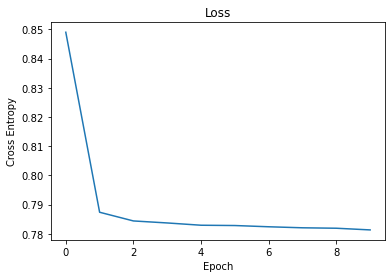

In [29]:
print(embedder._history)
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_title('Loss')
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')
plt.savefig('parametriclossthesisnew.png')

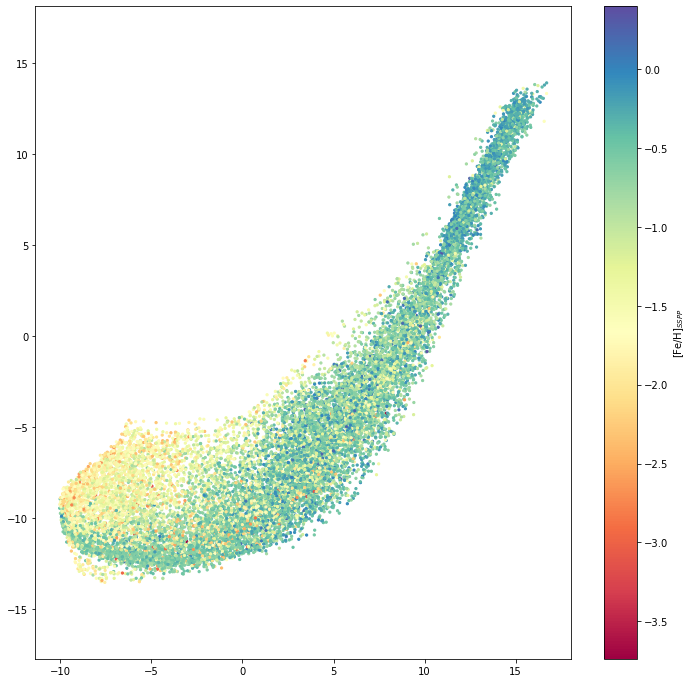

In [51]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeHspec'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(label=r'[Fe/H]$_{SSPP}$')
# plt.title("Parametric UMAP, autoencoded, MinMax scaled");
plt.savefig('parametricplotspecthesisnew.png')

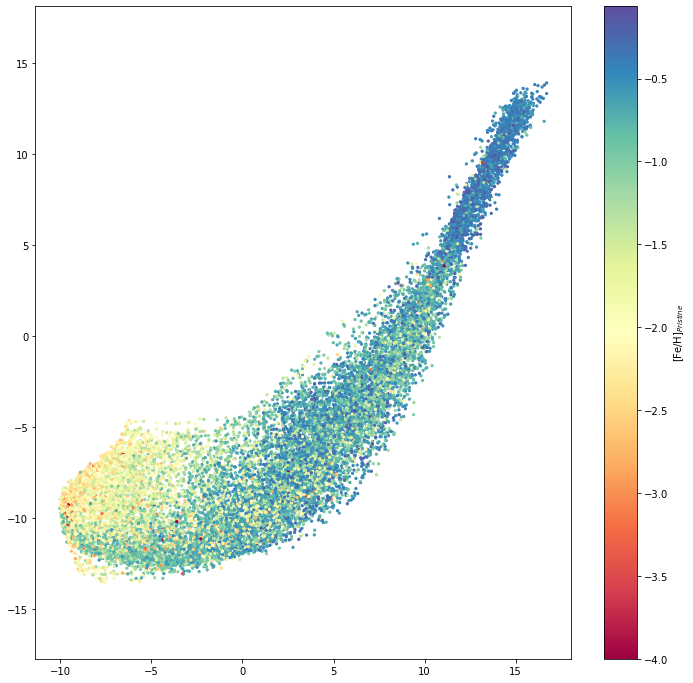

In [52]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(label=r'[Fe/H]$_{Pristine}$')
# plt.title("Parametric UMAP, autoencoded, MinMax scaled");
plt.savefig('parametricplotphotthesisnew.png')

In [32]:
# pristine2 = pd.read_csv('/arc/home/aydanmckay/mega.csv')

In [33]:
# pristine2 = pristine2.loc[(pristine2["g_chp_psf_cp"] < 1e19) & (pristine2["r_chp_psf_cp"] < 1e19) & (pristine2["i_chp_psf_cp"] < 1e19) & \
#                         (pristine2["z_chp_psf_cp"] < 1e19) & (pristine2["y_chp_psf_cp"] < 1e19) & (pristine2["MAG_AUTO_cp"] < 95) & \
#                         (np.isnan(pristine2["phot_g_mean_mag_1_cp"]) == False) & (np.isnan(pristine2["phot_bp_mean_mag_1_cp"]) == False) & \
#                         (np.isnan(pristine2["pmra_1_cp"]) == False) & (np.isnan(pristine2["pmdec_1_cp"]) == False) & \
#                         (np.isnan(pristine2["pmra_error_1_cp"]) == False) & (np.isnan(pristine2["pmdec_error_1_cp"]) == False) & \
#                         (np.isnan(pristine2["phot_rp_mean_mag_1_cp"]) == False)]
# pristine2.shape

In [34]:
# dfnew = pd.DataFrame({'PMRA': pristine2['pmra_1_cp'], 
#                    'PMDec': pristine2['pmdec_1_cp'],
#                    # 'EBV': pristine['EBV_pp'],
#                    'G_gaia': pristine2['CaHK_pp']-pristine2['Gmag_pp'],
#                    'B_gaia': pristine2['CaHK_pp']-pristine2['BPmag_pp'],
#                    'R_gaia': pristine2['CaHK_pp']-pristine2['RPmag_pp'],
#                    'G_pan': pristine2['CaHK_pp']-pristine2['g_chp_psf_cp'],
#                    'R_pan': pristine2['CaHK_pp']-pristine2['r_chp_psf_cp'],
#                    'I_pan': pristine2['CaHK_pp']-pristine2['i_chp_psf_cp'],
#                    'Z_pan': pristine2['CaHK_pp']-pristine2['z_chp_psf_cp'],
#                    'Y_pan': pristine2['CaHK_pp']-pristine2['y_chp_psf_cp'],
#                    'AUTO_cfis': pristine2['CaHK_pp']-pristine2['MAG_AUTO_cp']})

In [35]:
# dfnew

In [36]:
# scaled_train2 = scaled_train.transform(dfnew)

In [37]:
# dfnew.max()

In [38]:
# dfnew.min()

In [39]:
embedding2 = embedder.transform(scaled_train2)

3096/3096 [==============================] - 6s 2ms/step


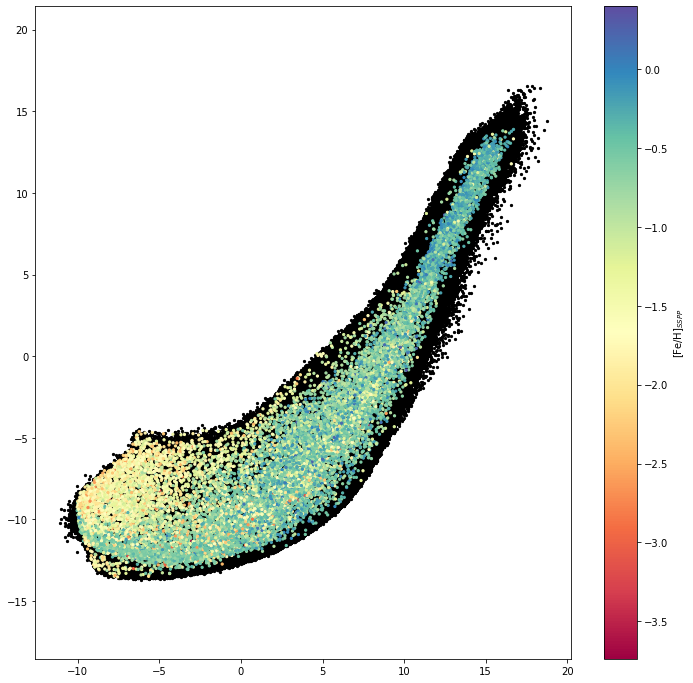

In [53]:
plt.figure(figsize=(12,12))
plt.scatter(embedding2[:, 0], embedding2[:, 1],c='k', cmap='Spectral', s=5)
plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeHspec'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(label=r'[Fe/H]$_{SSPP}$')
plt.savefig('parametricoverplotspecthesisnew.png')

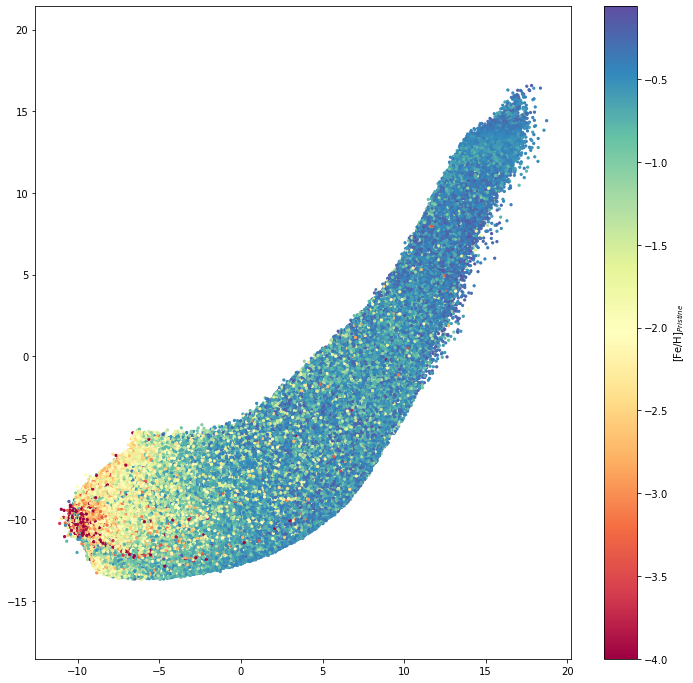

In [55]:
plt.figure(figsize=(12,12))
plt.scatter(embedding2[:, 0], embedding2[:, 1],c=df2new['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeHspec'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(label=r'[Fe/H]$_{Pristine}$')
plt.savefig('parametricoverplotphotthesisnew.png')

In [42]:
# from umap.parametric_umap import load_ParametricUMAP

In [43]:
# embedder.save('/arc/home/aydanmckay/paraumap')

In [44]:
# embedder = load_ParametricUMAP('/arc/home/aydanmckay/paraumap')

In [45]:
# @article{sainburg2021parametric,
#   title={Parametric UMAP Embeddings for Representation and Semisupervised Learning},
#   author={Sainburg, Tim and McInnes, Leland and Gentner, Timothy Q},
#   journal={Neural Computation},
#   volume={33},
#   number={11},
#   pages={2881--2907},
#   year={2021},
#   publisher={MIT Press One Rogers Street, Cambridge, MA 02142-1209, USA journals-info~…}
# }